In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 

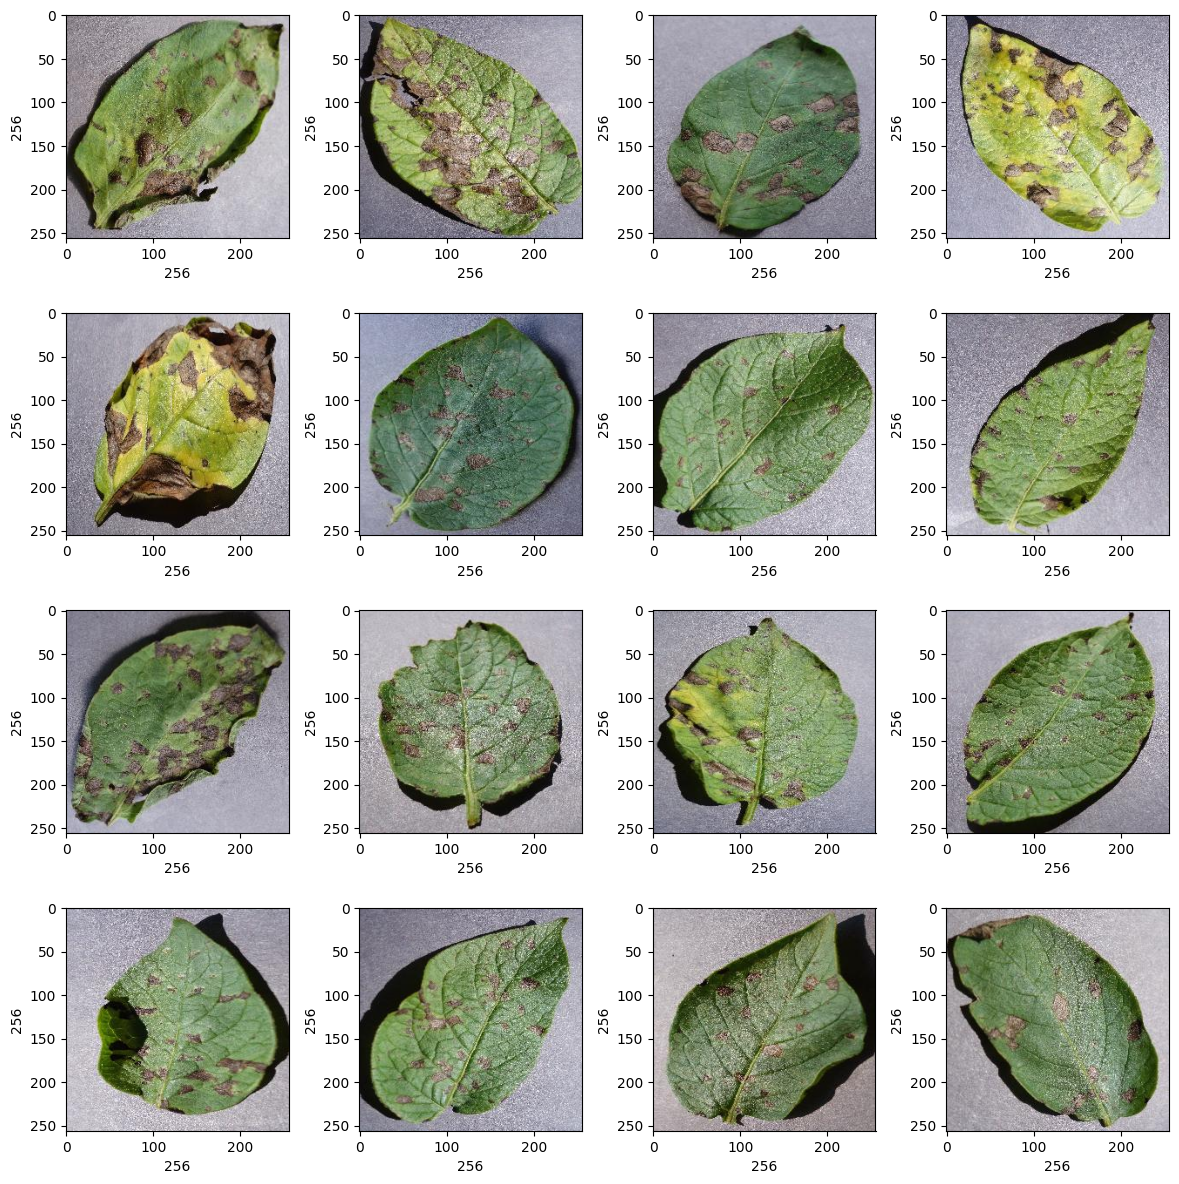

In [2]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = r"C:\Users\USER\Python Files\Plant_images_pianalytix\Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [3]:
#Converting Images to array 
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [4]:
dir = r"C:\Users\USER\Python Files\Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [5]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
Name: count, dtype: int64

In [6]:
# Next we will observe the shape of the image.
image_list[0].shape

(256, 256, 3)

In [7]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [9]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [13]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [14]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 73s 12s/step - loss: 1.0783 - accuracy: 0.3368 - val_loss: 1.0358 - val_accuracy: 0.3264
Epoch 2/50
5/5 [==============================] - 57s 10s/step - loss: 1.0164 - accuracy: 0.3368 - val_loss: 0.9863 - val_accuracy: 0.3264
Epoch 3/50
5/5 [==============================] - 51s 10s/step - loss: 0.9662 - accuracy: 0.3368 - val_loss: 0.9369 - val_accuracy: 0.3264
Epoch 4/50
5/5 [==============================] - 52s 10s/step - loss: 0.9195 - accuracy: 0.3420 - val_loss: 0.8895 - val_accuracy: 0.3611
Epoch 5/50
5/5 [==============================] - 55s 11s/step - loss: 0.8739 - accuracy: 0.3958 - val_loss: 0.8475 - val_accuracy: 0.4931
Epoch 6/50
5/5 [==============================] - 56s 10s/step - loss: 0.8366 - accuracy: 0.5156 - val_loss: 0.8141 - val_accuracy: 0.5833
Epoch 7/50
5/5 [==============================] - 51s 10s/step - loss: 0.8091 - accuracy: 0.5903 - val_loss: 0.7888 - val_accuracy: 0.6319
Epoch 8/50
5/5 [===========

In [15]:
model.save(r"C:\Users\USER\Python Files\plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open(r"C:\Users\USER\Python Files\plant_model.json", 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights(r"C:\Users\USER\Python Files\plant_model_weights.h5")

C:\Users\USER\anaconda3\envs\DataFrame\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


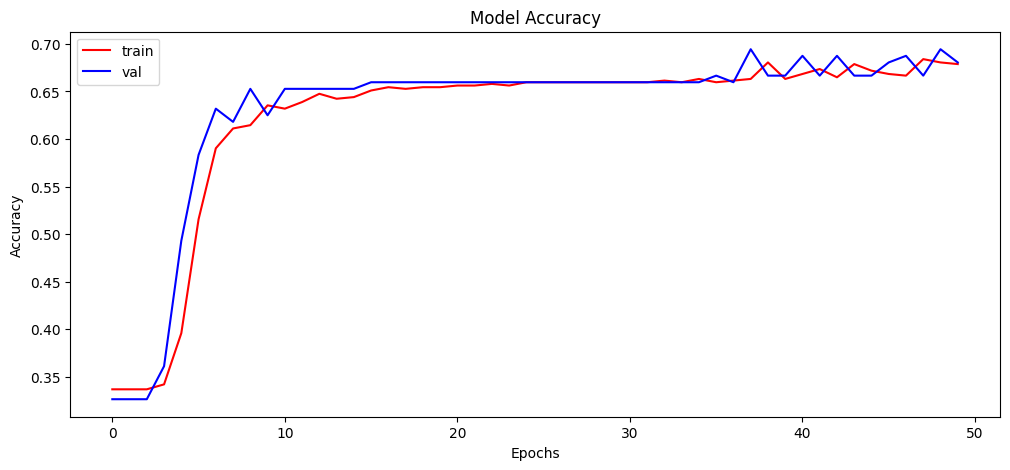

In [16]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [17]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 2s 331ms/step - loss: 0.3635 - accuracy: 0.7056
Test Accuracy: 70.55555582046509


In [18]:
y_pred = model.predict(x_test)

6/6 [==============================] - 3s 373ms/step


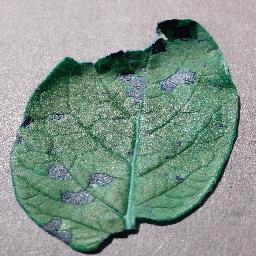

In [19]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [20]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight
